## Main Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import os 
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")


# preprocessing
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , cross_val_score , cross_val_predict 
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import confusion_matrix , classification_report , mean_squared_error


# Algorithm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# Deep Learning
from keras import layers , Sequential 
from tensorflow.keras.layers import Dense ,  Dropout , BatchNormalization 

In [51]:
## show datasests

path_data = "D:\ML_data\Loan_staute.csv"


if os.path.exists(path_data):
    df = pd.read_csv(path_data)
    print(df.head())
    
else:
    print("Sorry , your file  not found.")
    

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Each row represents a single loan application, and the columns describe different details about the applicant and the loan:

# Loan_ID: A unique identifier for each loan application.
# Gender: The applicant's gender (Male in all cases shown).
# Married: Whether the applicant is married (Yes or No).
# Dependents: The number of dependents the applicant has (0 or 1).
# Education: The applicant's education level (Graduate or Not Graduate).
# Self_Employed: Whether the applicant is self-employed (Yes or No).
# ApplicantIncome: The applicant's income.
# CoapplicantIncome: The co-applicant's income (if applicable).
# LoanAmount: The amount of the loan requested.
# Loan_Amount_Term: The length of the loan term in months (360 in all cases shown).
# Credit_History: The applicant's credit history (1.0 likely indicates a good history).
# Property_Area: The property area (Urban or Rural).
# Loan_Status: Whether the loan was approved (Y) or not (N).
# Key Observations:

# All applicants in this sample are male.
# Most applicants are married and have no dependents.
# Most applicants are not self-employed.
# Loan amounts vary, but most terms are for 360 months.
# Most applicants have good credit history.
# Most properties are in urban areas.
# Of these 5 applications, 4 were approved.

In [55]:
# Summary for Numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [56]:
# Summary for categorical columns

df.describe(include="object").T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [57]:
# check null 

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

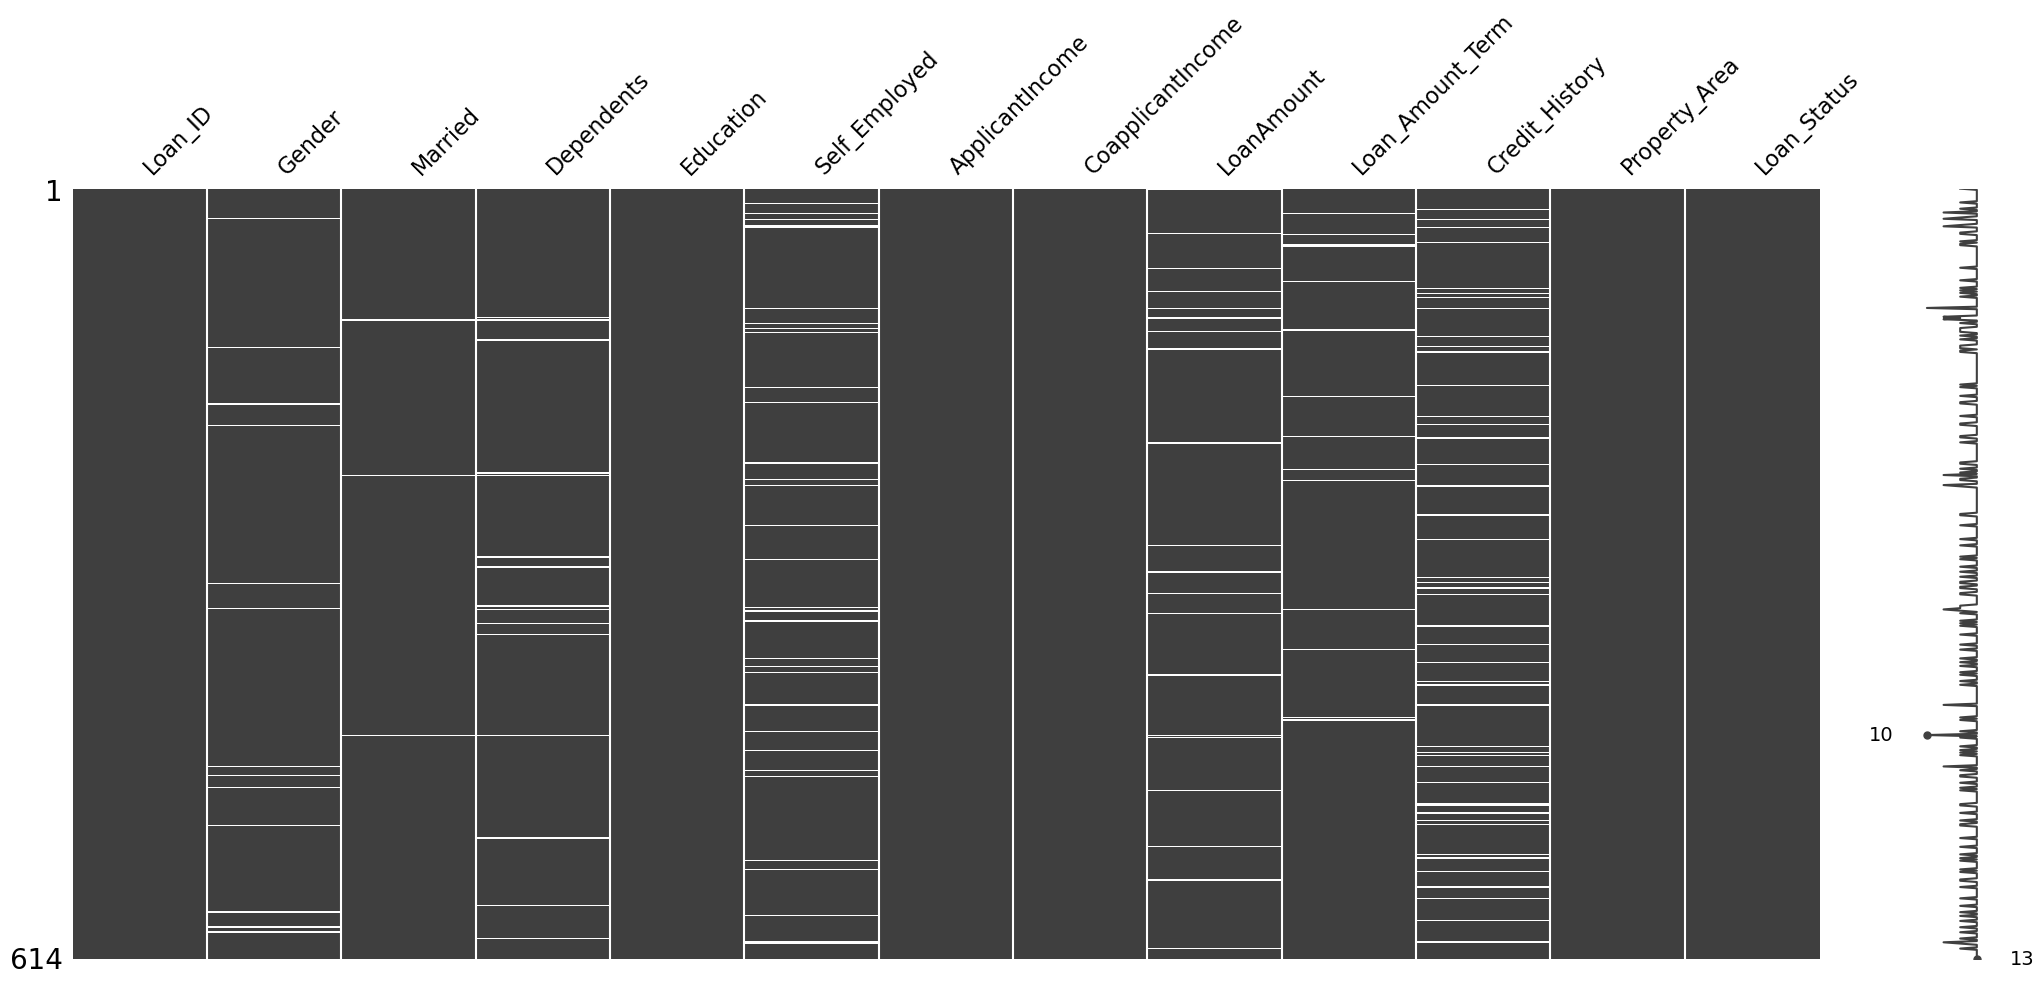

In [58]:
# show null in gragh
mis.matrix(df)

<Axes: >

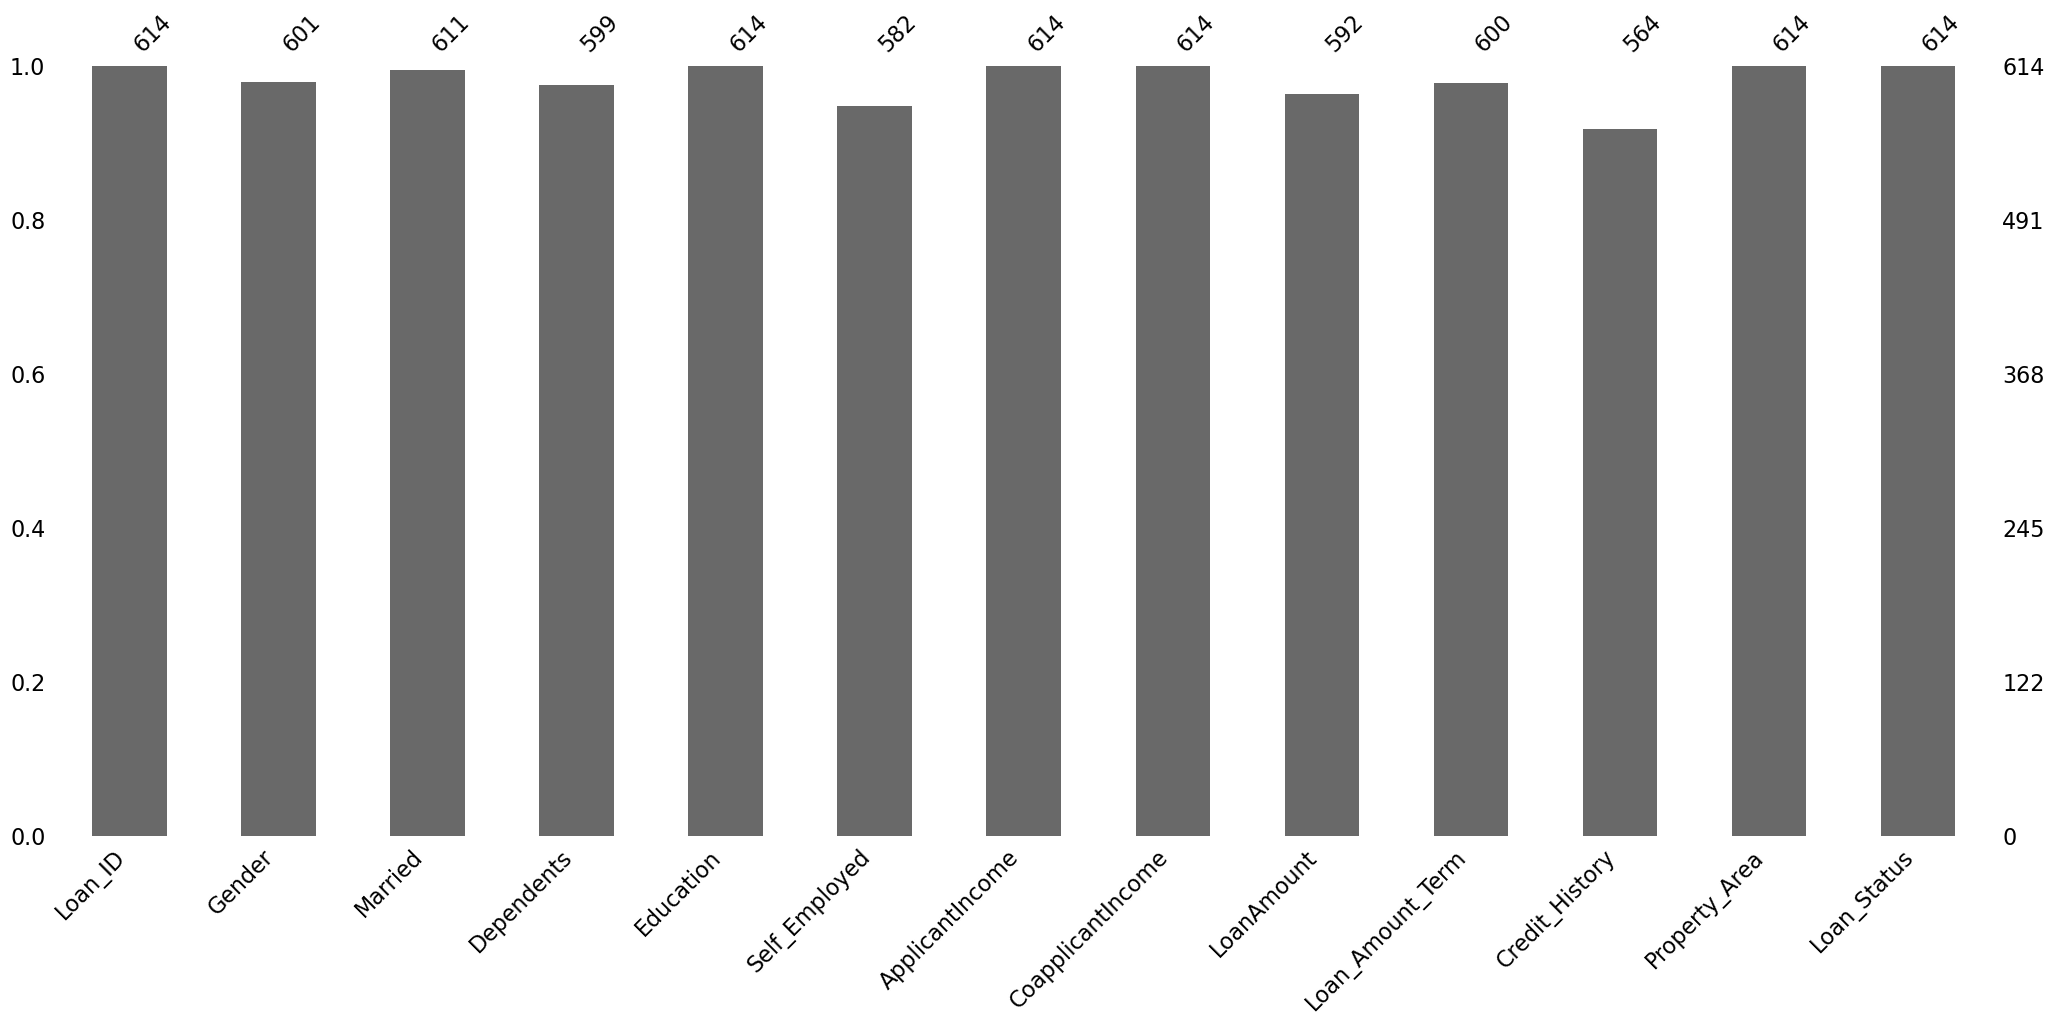

In [59]:
# show null in gragh
mis.bar(df)

In [60]:
# Numerical columns

df._get_numeric_data()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [61]:
df.shape

(614, 13)

# Exploratory Data Analysis (EDA)

In [62]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
nu = df.nunique()
nu

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [64]:
for col, count in df.nunique().items():
    if count > 5:
        continue
    print(df[col].value_counts())
    print("========================================")


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [65]:
sc = px.scatter(df , x="LoanAmount" , title="scatter of LoanAmount")
sc.show()

In [66]:
sc = px.scatter(df , x="ApplicantIncome" , title="scatter of ApplicantIncome")
sc.show()

In [67]:
sc = px.scatter(df , x="CoapplicantIncome" , title="scatter of CoapplicantIncome")
sc.show()

In [68]:
fig_age = px.histogram(df, x='LoanAmount', title='LoanAmount Distribution')
fig_age.show()

In [69]:
fig_age = px.histogram(df, x='Loan_Status', title='LoanAmount Distribution')
fig_age.show()

In [70]:
# Male      489
# Female    112

labels = ["Male", "Female"]  
values = (489, 112)
plt.figure(figsize=(12,8))
# Create the pie chart
fig = px.pie(
    values=values,  
    names=labels,   
    title="Distribution of Male and Female Individuals", 
)

# Display the chart
fig.show()


<Figure size 1200x800 with 0 Axes>

In [71]:
# Yes    398
# No     213

labels = ["Yes", "No"]  
values = (398, 213)
plt.figure(figsize=(12,8))
# Create the pie chart
fig = px.pie(
    values=values,  
    names=labels,   
    title="Distribution of Married or Not", 
)

# Display the chart
fig.show()


<Figure size 1200x800 with 0 Axes>

In [72]:
# Y    422
# N    192

labels = ["Y", "N"]  
values = (422, 192)
plt.figure(figsize=(12,8))
# Create the pie chart
fig = px.pie(
    values=values,  
    names=labels,   
    title="Distribution of Loan_Status or Not", 
)

# Display the chart
fig.show()


<Figure size 1200x800 with 0 Axes>

In [73]:
px.bar(df, x="Loan_Status", y="ApplicantIncome")  


In [74]:
px.box(df, x="Loan_Status", y="ApplicantIncome") 


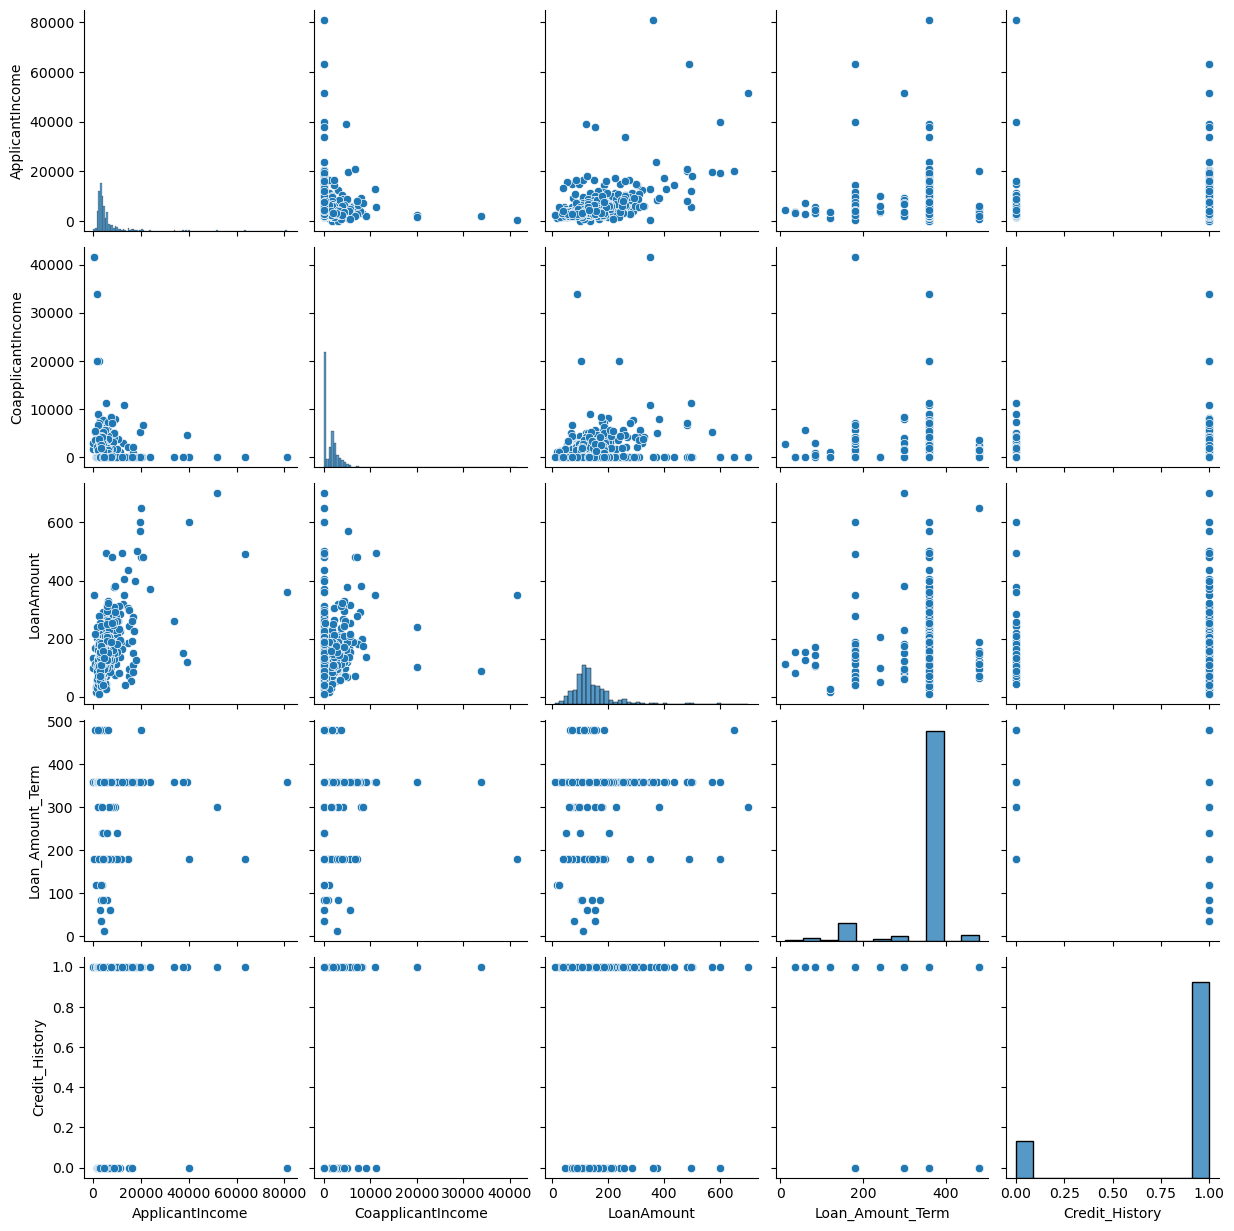

In [75]:
sns.pairplot(df)

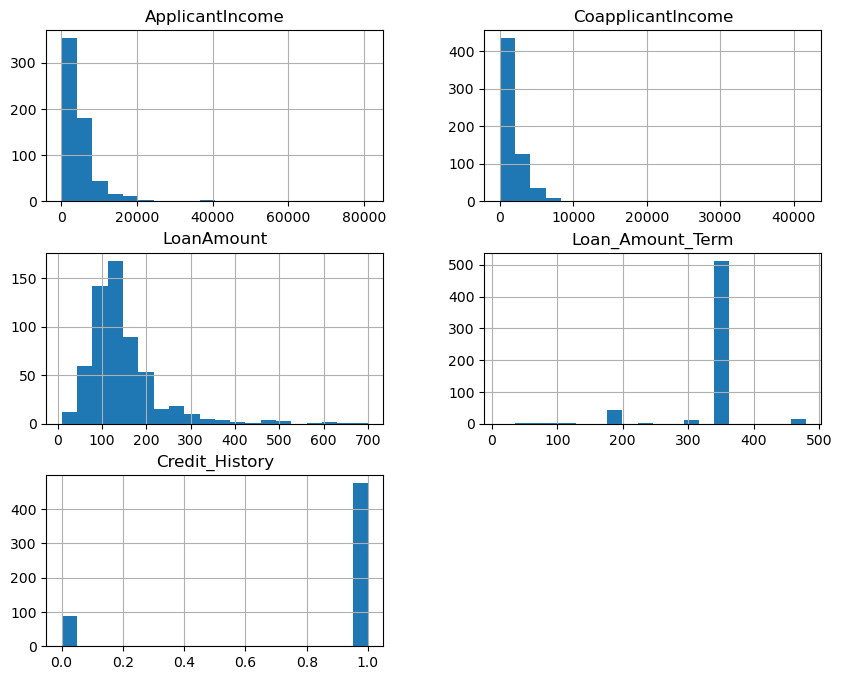

In [76]:
df.hist(bins=20 , figsize=(10,8))
plt.show()

In [77]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
sc = px.scatter(df , x="LoanAmount" , y="ApplicantIncome" , title="scatter of CoapplicantIncome")
sc.show()

In [79]:
# Semiurban    233
# Urban        202
# Rural        179



labels = ["Semiurban", "Urban" , "Rural"]  
values = (233, 202 , 179)
plt.figure(figsize=(12,8))
# Create the pie chart
fig = px.pie(
    values=values,  
    names=labels,   
    title="Distribution of Property_Area ", 
)

# Display the chart
fig.show()

<Figure size 1200x800 with 0 Axes>

In [80]:
px.box(df, x="Property_Area", y="LoanAmount") 


In [81]:
px.box(df, x="Gender", y="LoanAmount") 


In [82]:
df._get_numeric_data().columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

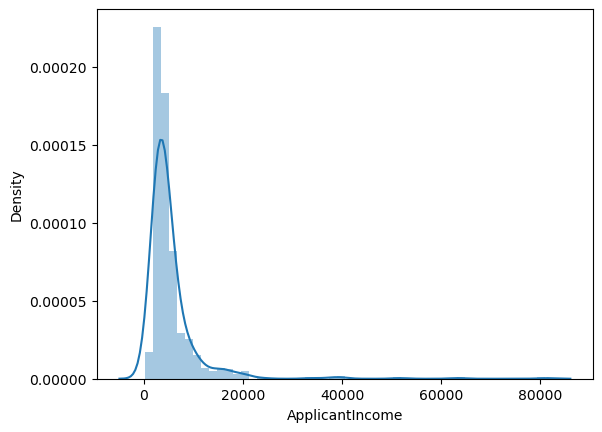

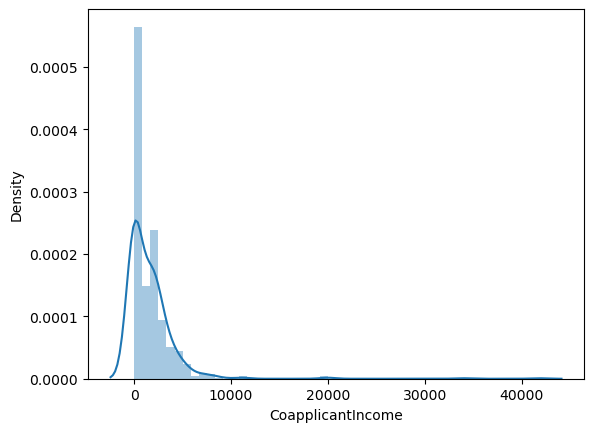

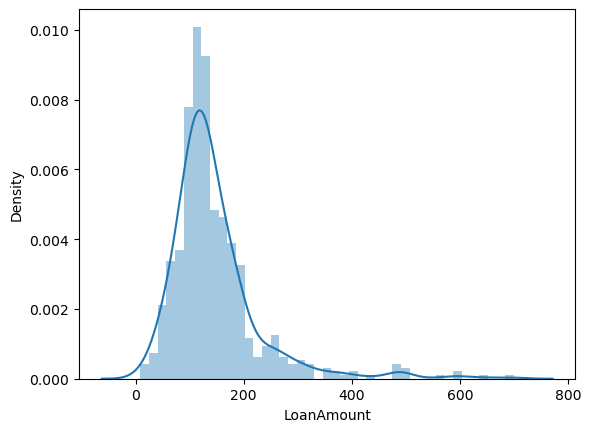

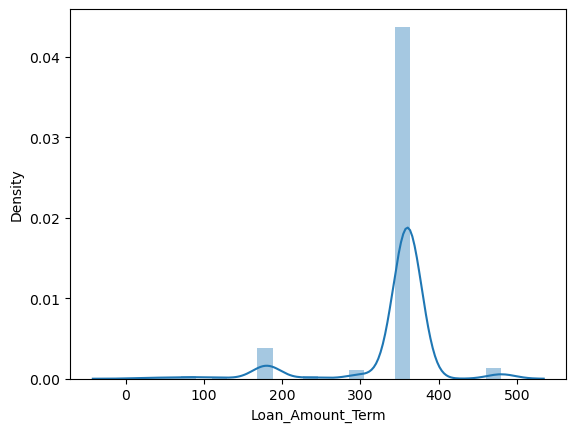

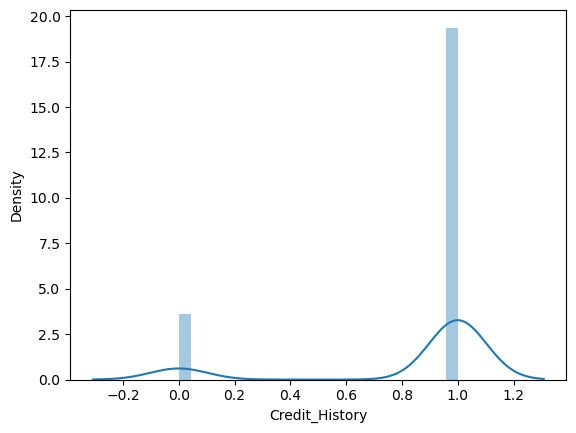

In [83]:
for col in df._get_numeric_data():
    sns.distplot(df[col])
    plt.show()


In [84]:
df = df.drop(columns=["Loan_ID"] , axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [85]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


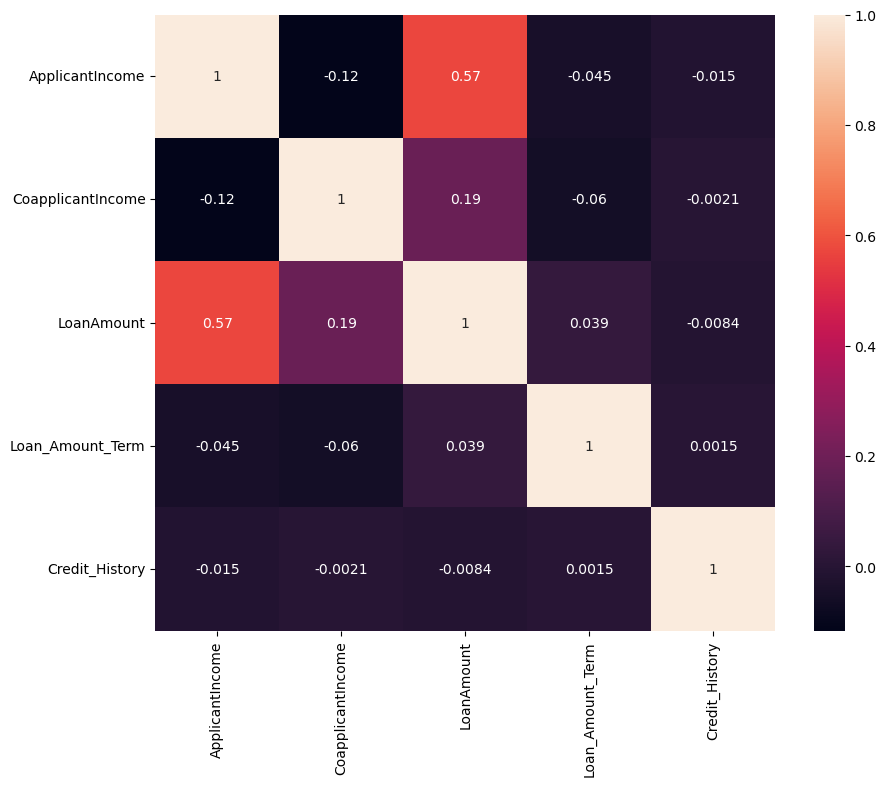

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True )
plt.show()

In [87]:
X = df.drop(columns=["Loan_Status"] , axis=1)  # Features
y = df["Loan_Status"] # Target
y = LabelEncoder().fit_transform(y)

In [88]:
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=123)

In [89]:
print(f"the shape of X_train is {X_train.shape}")
print(f"the shape of X_test is {X_test.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of X_train is (491, 11)
the shape of X_test is (123, 11)
the shape of y_train is (491,)
the shape of y_test is (123,)


In [90]:
col_nums = [col for col in X_train.columns if X_train[col].dtype in ["int32" , "int64" , "float32" , "float64"]]
col_catg = [col for col in X_train.columns if X_train[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]

if (col_nums) and (col_catg):
    print(f" nums cols is \n {col_nums}")
    print(f" catg cols is \n {col_catg}")

elif col_catg:
        print(f" catg cols is \n {col_catg}")

else:
    print(f" nums cols is \n {col_nums}")


 nums cols is 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
 catg cols is 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [91]:
## Assuming "EUR/USD" is a valid column name
pip_num = Pipeline(steps=[("select", DataFrameSelector(col_nums)),
                           ("Simple", SimpleImputer(strategy="median")),
                           ("scaler", StandardScaler())])





pip_catg = Pipeline(steps=[
                 ("selector", DataFrameSelector(col_catg)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", LabelEncoder())
                ])


In [92]:
def Preprocessing(cols_nums, col_catg, X_train, X_test):
    if cols_nums and col_catg:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", pip_num),
                                                        ("cate_pipeline", pip_catg)])

        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    elif col_catg == [] and cols_nums:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    else:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final



X_train_final, X_test_final = Preprocessing(col_nums, col_catg, X_train, X_test)
print(f"X_train_final is = {X_train_final}")
print("*"*50)
print(f"X_test_final is = {X_test_final[:10]}")


X_train_final is = [[-0.38092354  0.58777817  0.22324719  0.27401738  0.40776315]
 [ 1.12347845 -0.62329823 -0.75344015  0.27401738  0.40776315]
 [-0.08727844 -0.04744531  0.08550923  0.27401738  0.40776315]
 ...
 [ 0.16133852 -0.62329823  0.16063903  0.27401738  0.40776315]
 [ 0.20290297 -0.62329823 -0.12735852  0.27401738  0.40776315]
 [-0.3008735  -0.08896318 -0.5405724   0.27401738  0.40776315]]
**************************************************
X_test_final is = [[-0.63146478 -0.62329823 -1.02891607  0.27401738  0.40776315]
 [-0.51215943  0.14063066 -0.4278777   0.27401738  0.40776315]
 [ 6.26496179 -0.62329823  0.1105525   0.27401738  0.40776315]
 [-0.08747086  0.20415301  0.06046597  0.27401738  0.40776315]
 [-0.15943893  0.12859048  0.21072556  0.27401738 -2.45240407]
 [-0.51389128  0.22947892 -0.49048587  0.27401738  0.40776315]
 [ 0.22387762 -0.62329823  0.39855005  0.27401738  0.40776315]
 [-0.31973144 -0.17365965 -0.10231525  0.27401738  0.40776315]
 [-0.62453737  1.4787517

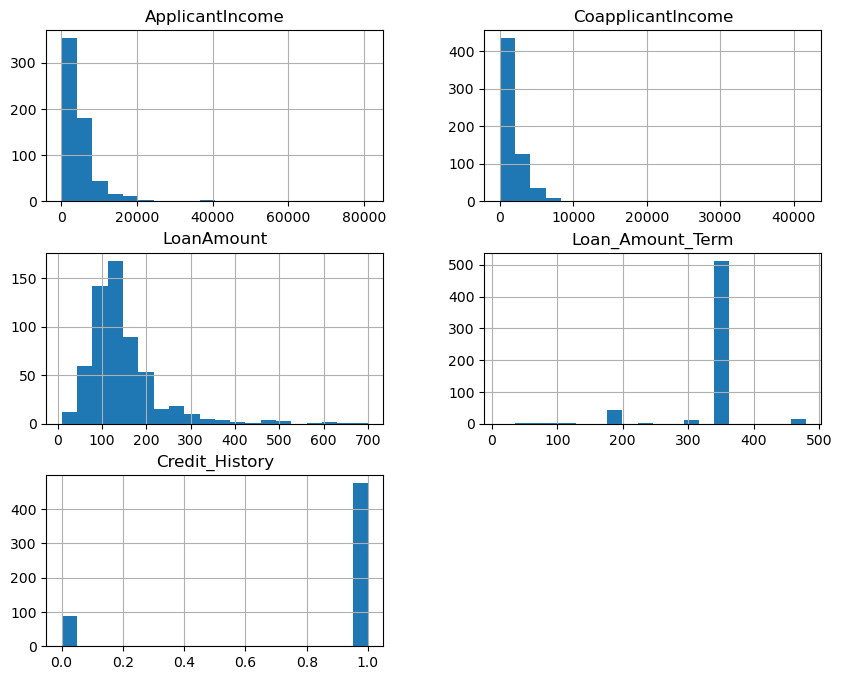

In [93]:
df.hist(bins=20 , figsize=(10,8))
plt.show()

## Solve skewed by log transform

In [94]:
colms = (df._get_numeric_data()).columns
colms

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [95]:
colms = [cols for cols in (df._get_numeric_data()).columns]
for col in colms:
    df[col] = np.log(df[col] + 1e-10).astype(float)

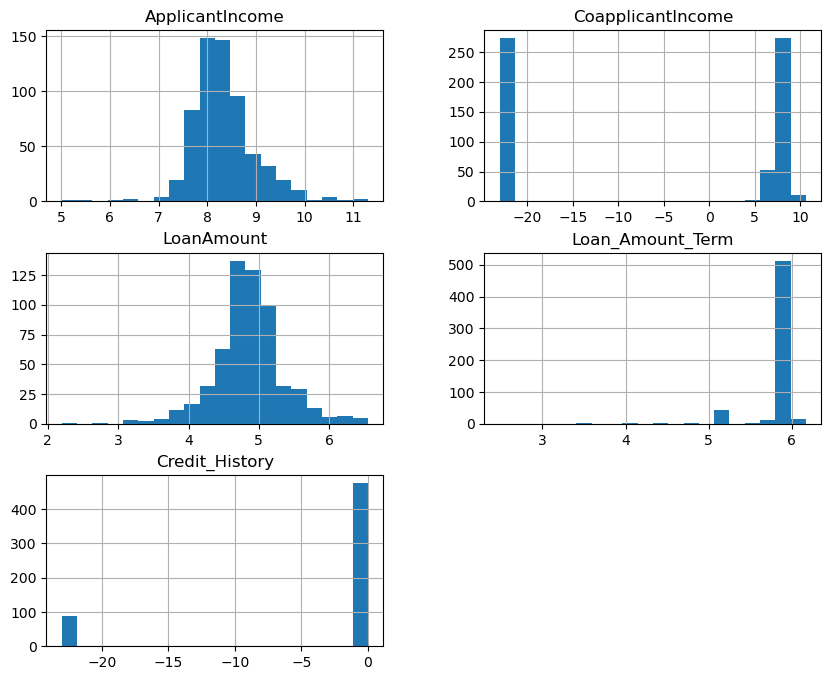

In [97]:
df.hist(bins=20 , figsize=(10,8))
plt.show()

# Model ML

# RandomForestClassifier

In [48]:
Random = RandomForestClassifier()

In [49]:
# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [i for i in range(100 ,500 ,100)],
    "max_depth": [i for i in range(3,15,3)],
    "criterion": ['entropy', 'gini', 'log_loss'],
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    estimator=Random,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train_final, y_train)



KeyboardInterrupt



In [ ]:
print("Best parameters : \n", random_model.best_params_)


In [ ]:
Rand_sea = random_model.best_estimator_
Rand_sea

In [ ]:
corss_val = cross_val_score(estimator=Rand_sea ,X = X_train_final , y=y_train ,
                            scoring="accuracy" , cv=5 , n_jobs=-1)

print("Score is ==>>\n ",abs(corss_val))

print("cross val score mean is ==>> ",corss_val.mean())

In [ ]:
cross_val_pred = cross_val_predict(estimator=Rand_sea ,X = X_train_final , y=y_train ,
                                  method="predict" , cv=5 , n_jobs=-1)


# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

In [ ]:
# X_train_final.shape[1]

In [ ]:
df.columns

In [ ]:
mylist = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
importance = random_model.best_estimator_.feature_importances_
# print(importance)
# print(mylist)
names = df.columns.tolist()
print("names" , names)
for _ in range(X_train_final.shape[1]):
    print((names[_] , importance[[_]]))

In [ ]:
y_pred = Rand_sea.predict(X_test_final)
y_pred[:5]

In [ ]:
pd.DataFrame(np.c_[y_pred , y_test] , columns=["prediction" , "actual"])

In [ ]:
confusion = confusion_matrix(y_test , y_pred)
confusion

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(confusion , fmt="g" , annot=True , cbar=True , vmin=0 , cmap="Blues")
plt.xticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.yticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.xlabel("Predicted" , fontsize=14 , color="b")
plt.ylabel("Actula" , fontsize=14 , color="b")
plt.title("Confusion Matrix" , fontsize=20 , color="m")
plt.show()

In [ ]:
print(f" some details \n {classification_report(y_test , y_pred)}")

# XGBoost

In [ ]:
xg_clas = xgb.XGBClassifier()
xg_clas.fit(X_train_final , y_train)

In [ ]:
cross_val_xgb = cross_val_score(estimator=xg_clas , X=X_train_final , y=y_train ,
                            cv=5 , scoring="accuracy" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb))

print("cross val score mean is ==>> ",cross_val_xgb.mean())

In [ ]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=xg_clas, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)



# Calculate mean squared error
mse =np.sqrt(mean_squared_error(y_train, cross_val_pred))
# Print the MSE
print(f"The mean squared error is {mse:.4f}")

In [ ]:
len(df.columns) 

## Using Deep Learning

In [ ]:
# setting up the layers of Neural Network

model = Sequential([  
                          layers.Flatten(input_shape=(X_train.shape[1],)),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(2, activation='sigmoid')
])

model.summary()

In [ ]:
# compiling the Neural Network

model.compile(optimizer="adam" ,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# training the Neural Network
history = model.fit(X_train_final , y_train , epochs=100 )
history